**13.	What is the distribution of left-handed versus right-handed players?**

Importing requiered libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Reading requierd tables

In [2]:
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')
MatchEventInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchEventInfo.csv')

Droping duplicated data

In [3]:
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')
MatchEventInfo_dd = MatchEventInfo.drop_duplicates (subset = 'match_id')


Creating table for calculating each player wins

In [4]:
merged_HW = MatchHomeTeamInfo_dd[['match_id' ,
                                  'player_id']].merge(MatchAwayTeamInfo_dd[['match_id' ,
                                                                            'player_id']],
                                                                             on ='match_id').drop_duplicates(subset='match_id')
merged_EHW = merged_HW[['match_id' ,
                        'player_id_x' , 'player_id_y']].merge(MatchEventInfo_dd[['match_id',
                                                                                 'winner_code']],
                                                                                  on ='match_id').drop_duplicates(subset='match_id')
merged_EHW = merged_EHW.dropna()
merged_EHW.head()
merged_EHW['winner_id'] = merged_EHW.apply( lambda x : x['player_id_x']  if x['winner_code']==1 else x['player_id_y'] , axis = 1)

Creating the table of player's win and right or left handed

In [ ]:
player = pd.concat ([MatchHomeTeamInfo_dd[['player_id', 'plays']],
                     MatchAwayTeamInfo_dd[['player_id', 'plays']]]).drop_duplicates(subset = 'player_id')
player['no_win'] = 0
for no in player['player_id']:
    player['no_win'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[merged_EHW['winner_id'] == no].count()

In [16]:
dfr = pd.concat ([pd.get_dummies(player["plays"]) , player[['player_id' , 'no_win']]] , axis = 1)
right =dfr[['no_win']].loc[dfr['right-handed'] == True]
dfl = pd.concat ([pd.get_dummies(player["plays"]) , player[['player_id' , 'no_win']]] , axis = 1)
left =dfl[['no_win']].loc[dfl['left-handed'] == True]
left_per = round((dfl[['no_win']].loc[dfl['left-handed'] == True].count() / player["plays"].count()).values[0], 2)
right_per = round((dfr[['no_win']].loc[dfl['right-handed'] == True].count() / player["plays"].count()).values[0], 2) 
print (f"{left_per}% of players are left_handed")
print (f"{right_per}% of players are left_handed")

0.12% of players are left_handed
0.88% of players are left_handed


PLotting the distribution of left-handed versus right-handed

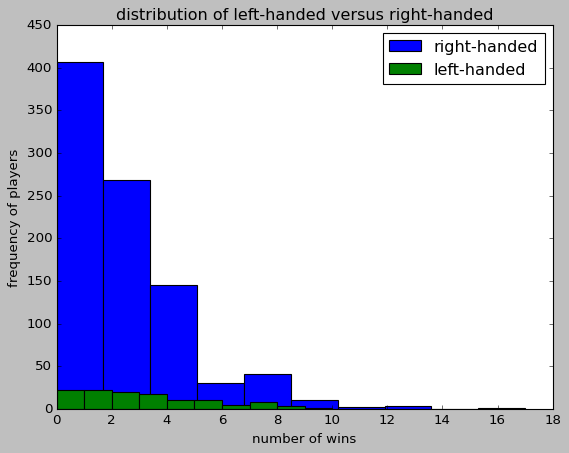

In [11]:
plt.style.use('classic')
plt.hist(right)
plt.hist(left)
plt.xlabel('number of wins')
plt.ylabel('frequency of players')
plt.legend( ['right-handed', 'left-handed'] , )
plt.title('distribution of left-handed versus right-handed');

**Distribution Tables**

In [8]:
fre_right = pd.DataFrame(columns = ['bin' , 'frequency'] )
fre_right ['frequency']= np.histogram(right)[0]
for i in range (0,len(np.histogram(right)[1])-1):
        fre_right ['bin'].iloc[int(i)] = f'({np.histogram(right)[1][int(i)]} , {np.histogram(right)[1][int(i)+1]})'


C:\Users\Maedeh\AppData\Local\Temp\ipykernel_3544\2160585657.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fre_right ['bin'].iloc[int(i)] = f'({np.histogram(right)[1][int(i)]} , {np.histogram(right)[1][int(i)+1]})'
C:\Users\Maedeh\AppD

In [9]:
fre_left = pd.DataFrame(columns = ['bin' , 'frequency'] )
fre_left ['frequency']= np.histogram(left)[0]
for i in range (0,len(np.histogram(left)[1])-1):
        fre_left ['bin'].iloc[int(i)] = f'({np.histogram(left)[1][int(i)]} , {np.histogram(left)[1][int(i)+1]})'

C:\Users\Maedeh\AppData\Local\Temp\ipykernel_3544\309131985.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fre_left ['bin'].iloc[int(i)] = f'({np.histogram(left)[1][int(i)]} , {np.histogram(left)[1][int(i)+1]})'
C:\Users\Maedeh\AppData\

In [10]:
print ('Frequency table of left-handed players')
print (fre_left)
print ('\nFrequency table of right-handed players')
print (fre_right)

Frequency table of left-handed players
            bin  frequency
0   (0.0 , 1.0)         22
1   (1.0 , 2.0)         22
2   (2.0 , 3.0)         20
3   (3.0 , 4.0)         18
4   (4.0 , 5.0)         11
5   (5.0 , 6.0)         10
6   (6.0 , 7.0)          5
7   (7.0 , 8.0)          8
8   (8.0 , 9.0)          3
9  (9.0 , 10.0)          1

Frequency table of right-handed players
                           bin  frequency
0                  (0.0 , 1.7)        407
1                  (1.7 , 3.4)        268
2                  (3.4 , 5.1)        145
3                  (5.1 , 6.8)         30
4                  (6.8 , 8.5)         41
5                 (8.5 , 10.2)         11
6                (10.2 , 11.9)          2
7                (11.9 , 13.6)          3
8  (13.6 , 15.299999999999999)          0
9  (15.299999999999999 , 17.0)          1
